In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats


In [75]:
filepath = "Resources/countries.csv"
eco_csv = pd.read_csv(filepath, header=0)
eco_csv.head()
# eco_csv.set_index("Region")
eco_csv.columns

Index(['Country', 'Region', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality'],
      dtype='object')

In [99]:
clean_df = eco_csv[['Country', 'Region', 'Total Ecological Footprint', 'Biocapacity Deficit or Reserve']]
clean_df.head()

,Country,Region,Total Ecological Footprint,Biocapacity Deficit or Reserve
0,Afghanistan,Middle East/Central Asia,0.79,-0.30
1,Albania,Northern/Eastern Europe,2.21,-1.03
2,Algeria,Africa,2.12,-1.53
3,Angola,Africa,0.93,1.61
4,Antigua and Barbuda,Latin America,5.38,-4.44


In [100]:
# convert GDP per Capita to float
gdp_df = eco_csv[eco_csv.columns[4]].replace('[\$,]', '', regex=True).astype(float)
gdp_df.head()
# print(gdp_df.mean())
# print(gdp_df.median())
# print(gdp_df.max())
# print(gdp_df.min())


0      614.66
1     4534.37
2     5430.57
3     4665.91
4    13205.10
Name: GDP per Capita, dtype: float64

In [101]:
merged_df = pd.merge(clean_df, gdp_df, left_index= True, right_index = True).set_index("Region")
mean_df = merged_df.groupby("Region").mean()
mean_df.head()
# median_df = merged_df.groupby("Region").median()
# median_df.head()
# clean_pivot = pd.pivot_table(merged_df, columns = ("Country"))
# clean_pivot

,Total Ecological Footprint,Biocapacity Deficit or Reserve,GDP per Capita
Region,,,
Africa,1.670962,0.591923,2668.142400
Asia-Pacific,2.970303,-0.143030,12192.205000
European Union,5.475385,-1.826923,35819.146923
Latin America,3.483846,6.080513,8376.773125
Middle East/Central Asia,4.054348,-3.081304,16368.722273


In [102]:
country_pivot = pd.pivot_table(merged_df, columns = ("Country"))
country_compare = country_pivot[["United States of America", "Israel", "Germany", "France", "United Kingdom", "China", "Denmark"]]
country_compare

Country,United States of America,Israel,Germany,France,United Kingdom,China,Denmark
Biocapacity Deficit or Reserve,-4.46,-5.87,-3.02,-2.04,-3.62,-2.44,-0.73
GDP per Capita,49725.00,33718.90,46822.40,45430.30,40980.50,5560.94,61413.60
Total Ecological Footprint,8.22,6.22,5.30,5.14,4.94,3.38,5.51


In [106]:
bins = {"<1000", "<5000", "<25000", "<125000", "<625000"}
labels = {"low", "low-med", "med", "med-high", "high", "very high"}
test_df= merged_df["Country"] = pd.cut(merged_df["GDP per Capita"], bins, labels=labels)

test_df

AxisError: axis -1 is out of bounds for array of dimension 0

In [78]:
usa = (clean_pivot.loc[:, "United States of America"])

In [12]:
# merged_df.set_index('Region')
# .groupby('Region')
merged_df.mean()

Population (millions)                37.342372
HDI                                   0.686360
Total Ecological Footprint            3.317606
Total Biocapacity                     4.019681
Biocapacity Deficit or Reserve        0.702074
GDP per Capita                    14238.324913
dtype: float64

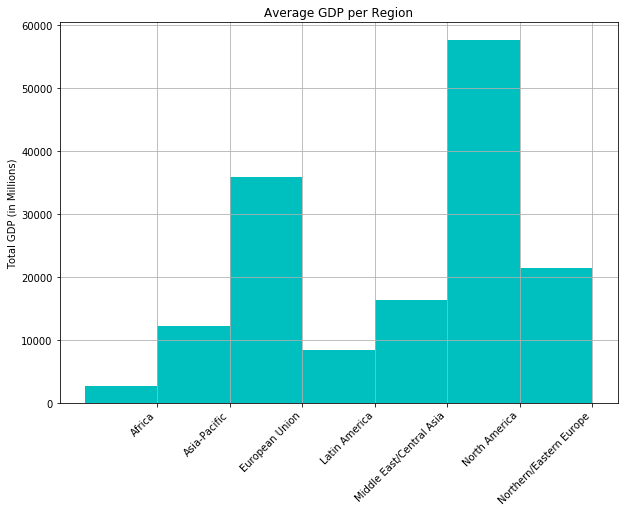

In [73]:
region_list = mean_df.index.tolist()
avg_gdp = mean_df['GDP per Capita'].tolist()

# # Set up axes  and labels
# fig, ax = plt.subplots(figsize=(10,7))
# x_ticks = np.arange(len(region_list))
# ax.set_xticks(x_ticks)
# ax.set_xticklabels(region_list, rotation=45, horizontalalignment='right')
# plt.grid()
# plt.axhline(linewidth=0.5, color='black')

# plt.title('Average GDP per Region')
# plt.ylabel('Total GDP (in Millions)')

# # Function to label the bars
# def autolabel(rects):
#     for rect in rects:
#         bar_height = rect.get_height()
        
#         # Formatting if bar is negative or positive
#         if bar_height >= 0:
#             label_va = bar_height + 3
#     ax.text(rect.get_x() + rect.get_width()/2, label_va,
#             str(int(bar_height)), ha='center')

# # Color the bars        
# bar_color = []
# for change in avg_gdp:
#         bar_color.append('c')
        
# # Plot the chart
# bar_format = ax.bar(x_ticks - 0.5, avg_gdp, width=1.0, color=bar_color)

